# Electric Vehicle (EV) Population Demographic in Washington
- Name: Jonathan Nguyen
- Description: This comprehensive dataset provides detailed information on Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) currently registered through the Washington State Department of Licensing (DOL). It offers a thorough examination of electric vehicle ownership patterns and trends, including vehicle registration, make, model, electric vehicle type, clean alternative fuel vehicle (CAFV) eligibility, electric range, base MSRP, legislative district, DOL vehicle ID, vehicle location, electric utility, and 2020 Census tract. 
- Application: Use descriptive statistics on the EV demographic of the state of Washing starting from the year 2015 to 2023. (Diversity of EV makes / average range of EVs)

# Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as py

# Importing The Dataset

In [2]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Wrangling

In [3]:
# Dropping the unwanted columns 
df = df.drop(['VIN (1-10)',
         'County',
         'City',
         'State',
         'Postal Code',
         'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
         'Legislative District',
         'DOL Vehicle ID', 
         'Vehicle Location',
         'Electric Utility',
         '2020 Census Tract',],
        axis = 'columns'
       )

In [4]:
# Sort by Model Year
df = df.sort_values('Model Year', ascending = True)

In [5]:
# Remove all vehicles before 2015
df = df[df['Model Year'] >= 2015]

In [6]:
# Remove Hybrid Vehicles
df = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']

In [7]:
df.head()

,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Base MSRP
37466,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),84,0
110523,2015,CHEVROLET,SPARK,Battery Electric Vehicle (BEV),82,0
110507,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),208,0
102715,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),84,0
27929,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),208,0


In [8]:
df.tail()

,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Base MSRP
37912,2024,BMW,IX,Battery Electric Vehicle (BEV),0,0
55824,2024,AUDI,Q8,Battery Electric Vehicle (BEV),0,0
106688,2024,BMW,IX,Battery Electric Vehicle (BEV),0,0
37929,2024,BMW,IX,Battery Electric Vehicle (BEV),0,0
137794,2024,MINI,HARDTOP,Battery Electric Vehicle (BEV),0,0


# What EVs make up Washington's EV population?

## Setup

Text(0, 0.5, '')

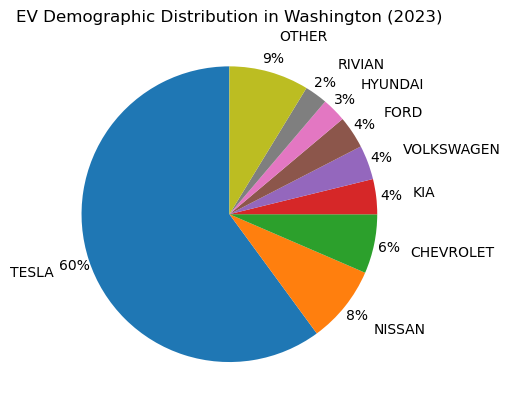

In [9]:
# Number of times a manufacturer appears in the data
mCount = df['Make'].value_counts()

# Clean up minor EV makes that don't provide much significance if displayed
# Sum the indexes of minor EV makes under 'Other' category
mCount['OTHER'] = mCount[mCount[mCount < 1900].index].sum()

# drop
mCount = mCount.drop(
    index = mCount[mCount < 1900].index)

# Pie Chart
mCount.plot(kind = 'pie', 
               autopct='%1.0f%%', 
               pctdistance = 1.1, 
               labeldistance = 1.25,
               startangle = 90)

# Title
plt.title('EV Demographic Distribution in Washington (2023)')

# Remove y-axis label
plt.ylabel('')

In [10]:
print(mCount)

Make
TESLA         70838
NISSAN         9967
CHEVROLET      7629
KIA            4527
VOLKSWAGEN     4424
FORD           4188
HYUNDAI        3132
RIVIAN         2934
OTHER         10292
Name: count, dtype: int64


- As you can see from the data Tesla makes up the majority of EVs in Washington with almost 61k more cars than the second highest manufacturer Nissan. Why is that?

# Average Range of EV Modes Based on Manufacturer

## Setup

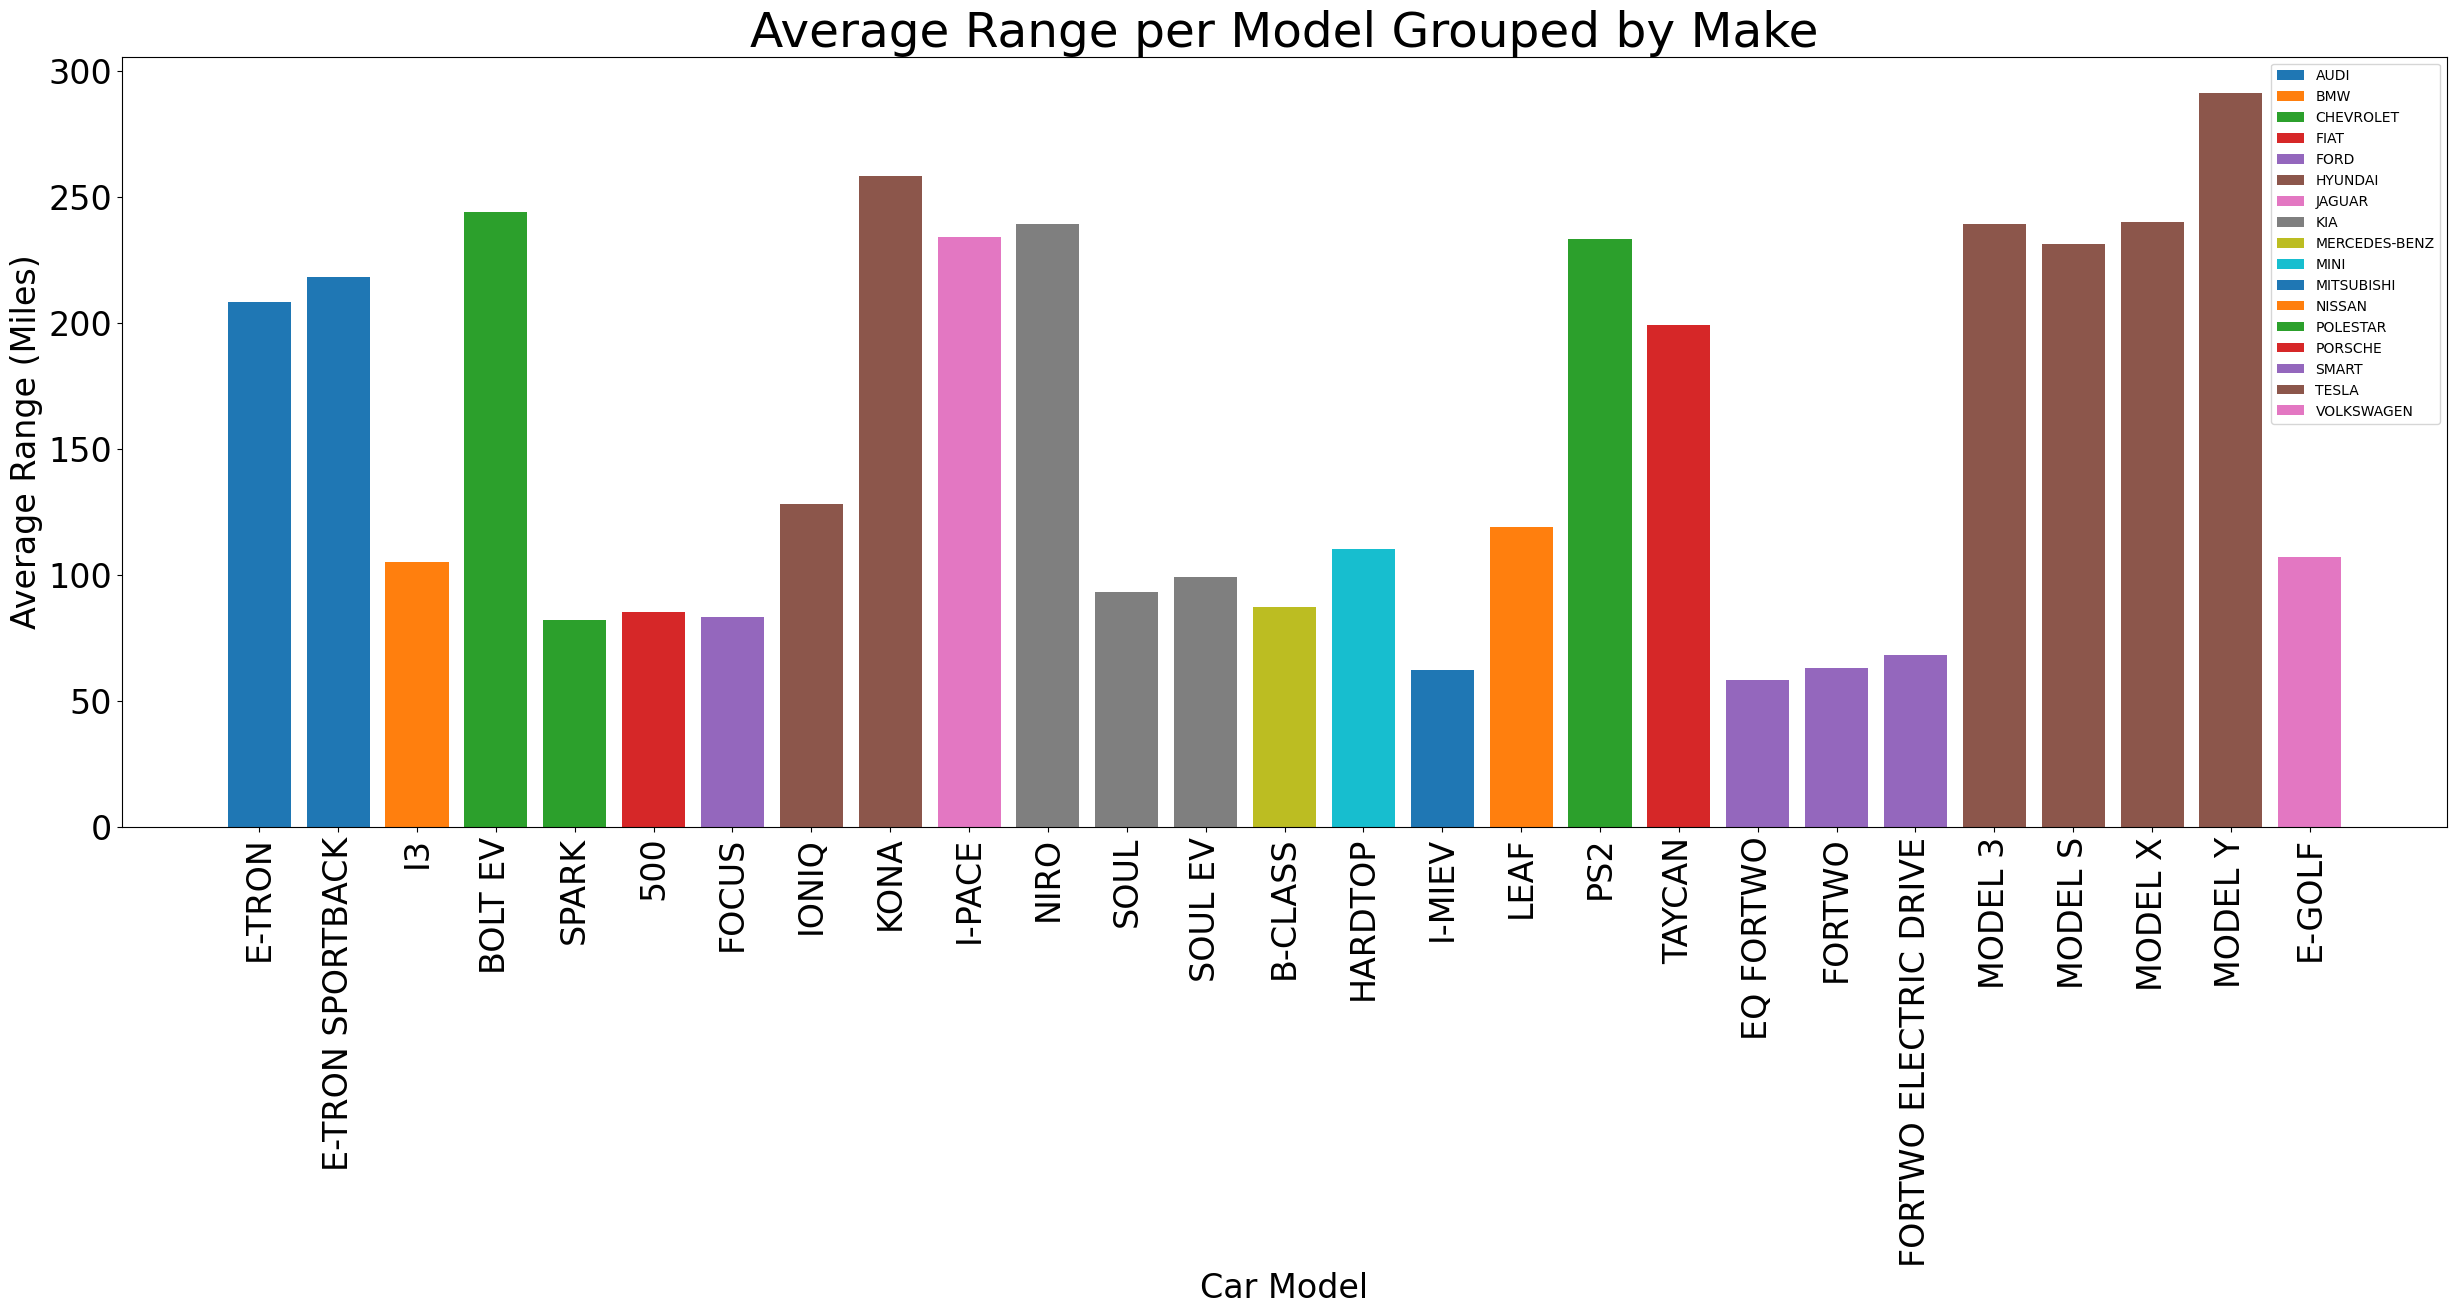

In [49]:
# Group make and model together, calculate mean, reset index to original index
dfRange = df[df['Electric Range'] != 0]
aveRangePerModel = dfRange.groupby(['Make', 'Model'])['Electric Range'].mean().round().reset_index()

# Plot
plt.figure(figsize=(30, 10))
for make, data in aveRangePerModel.groupby('Make'):
    plt.bar(data['Model'], data['Electric Range'], label=make)
    
# Labels

# x-axis
plt.xlabel('Car Model',
          fontsize = 24)
plt.xticks(rotation = 'vertical',
          fontsize = 24)
# y-axis
plt.ylabel('Average Range (Miles)',
          fontsize = 24)
plt.yticks(fontsize = 24)

# Title
plt.title('Average Range per Model Grouped by Make',
         fontsize = 35)

# legend
plt.legend()


- As you can see from the data Tesla EVs have all roughly the same range regardless of their models. 
- One thing that can be inferred is that Tesla EVs are consistent with their range regardless of their models being larger than a lot of other models of EVs.

# Conclusion
- Vehicle manufacturers are now switching to all electric because of this more Electric Vehicles (EVs) are being seen on the road.
- In the state of Washington Tesla Dominates the EV demographic making up 60% of all EVs on the road in Washington.
- A major factor that can be assumed is due to their longer range as well as conistency between all models
- But if that was the only motivating factor what about the other EVs with a similar range? 
- Could price be a motivating factor? Unfortunately the data set does not contain enough data to figure out for sure.

# Sources
- https://www.kaggle.com/datasets/adilashrafi/elecrict-vehicle/ by Adil Nawaz Ashrafi